# Clustering & PCA Assignment

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For KMeans clustering
from sklearn.cluster import KMeans

# For Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Reading the Data

In [2]:
#Loading and checking first 5 rows of the data
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.shape #Total number of rows and columns in the data

(167, 10)

In [4]:
df.info() #Data type of each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [5]:
df.describe() #Overall understanding of the data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
#Checking if there's any null values in the data
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### There are no null values in the data

### Data Preparation

In [7]:
# Converting the percentages to a relatable values

df['exports'] = df['exports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [8]:
# Checking the outliers before PCA

nums = df[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]
nums.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [9]:
# Variables - child_mort, exports, imports, income, inflation and gdpp do have outliers

In [10]:
# Importing the library to scale the numerical values
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

# Scaling the data
df1 = standard_scaler.fit_transform(nums)

/Users/rishabhkashyap/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/rishabhkashyap/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [11]:
# Scaled data
df1

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

### Performing PCA

In [12]:
# Importing the PCA library
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [13]:
# Performing the PCA
pca.fit(df1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [14]:
#List of PCA components
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [15]:
# Variance Ratio
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

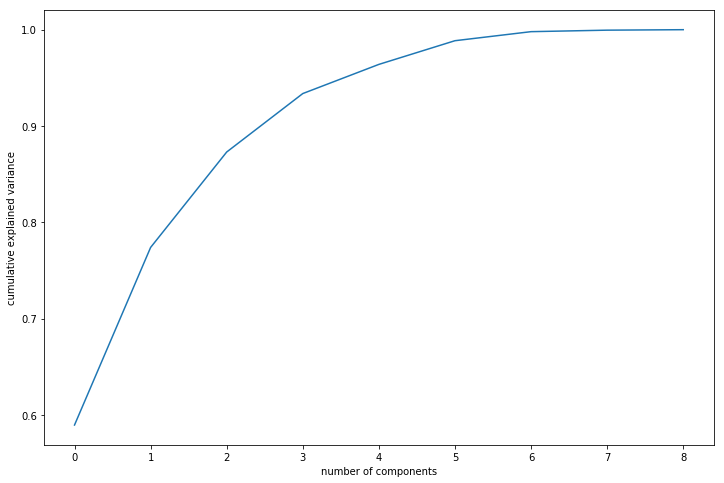

In [16]:
# Plotting the Scree plot
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Somewhere around 88% of the information is being explained by 2 components

In [17]:
colnames = list(nums.columns)
pca_df = pd.DataFrame({'Features':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1]})
pca_df

,Features,PC1,PC2
0,child_mort,-0.316392,0.476267
1,exports,0.342887,0.397311
2,health,0.358535,0.155053
3,imports,0.344865,0.370781
4,income,0.380041,0.128384
5,inflation,-0.143085,0.221261
6,life_expec,0.343857,-0.369820
7,total_fer,-0.302842,0.459715
8,gdpp,0.399988,0.200624


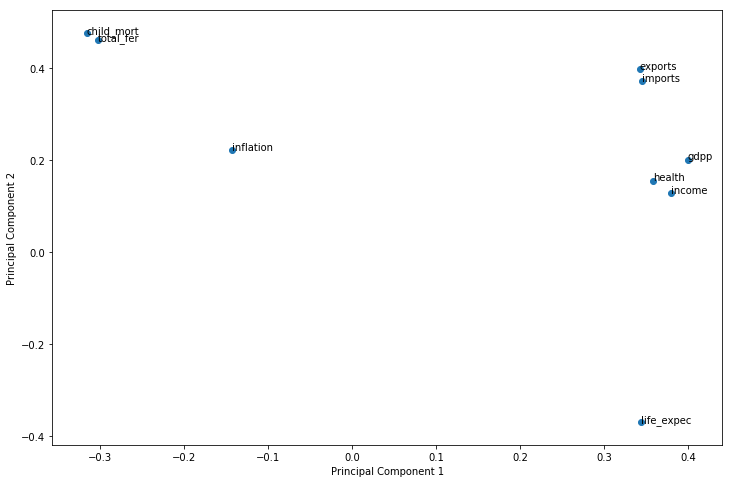

In [18]:
# Plot to visualize these features
fig = plt.figure(figsize=(12,8))
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, y in enumerate (pca_df.Features):
    plt.annotate(y,(pca_df.PC1[i],pca_df.PC2[i]))
plt.show()

In [19]:
# Importing Incremental PCA
from sklearn.decomposition import IncrementalPCA
pca1 = IncrementalPCA(n_components=2)

In [20]:
df_pca = pca1.fit_transform(df1)
df_pca.shape

(167, 2)

In [21]:
df_pca

array([[-2.63781321e+00,  1.48536461e+00],
       [-2.28210939e-02, -1.42971156e+00],
       [-4.56234772e-01, -7.07360261e-01],
       [-2.72276377e+00,  2.15229306e+00],
       [ 6.49117451e-01, -1.01774207e+00],
       [ 3.94157308e-02, -7.30261748e-01],
       [-3.32874986e-01, -1.27774541e+00],
       [ 3.18004346e+00, -2.42945480e-01],
       [ 3.81521984e+00,  2.70503210e-01],
       [-4.66682132e-01, -5.12070612e-01],
       [ 1.49764135e+00, -4.07261928e-01],
       [ 1.47173856e+00, -3.48835344e-01],
       [-1.01470326e+00, -7.04204726e-01],
       [ 8.44156324e-01, -9.92326449e-01],
       [-1.23125395e-02, -1.01063660e+00],
       [ 3.96056409e+00,  8.51654535e-01],
       [-4.03848235e-01, -9.05487852e-01],
       [-2.36763892e+00,  1.20900783e+00],
       [-7.15518871e-01, -7.61656090e-01],
       [-1.01785700e+00, -4.27509939e-01],
       [ 2.51782613e-01, -1.68612275e+00],
       [-1.13121768e+00,  4.07034302e-01],
       [ 1.66361284e-01, -1.02506573e+00],
       [ 2.

In [22]:
pc = np.transpose(df_pca)

In [23]:
pca_df1 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1]})
pca_df1.head()

,PC1,PC2
0,-2.637813,1.485365
1,-0.022821,-1.429712
2,-0.456235,-0.707360
3,-2.722764,2.152293
4,0.649117,-1.017742


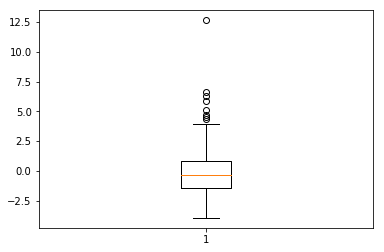

In [24]:
#Outlier Analysis on PCA
plt.boxplot(pca_df1.PC1)
q1 = pca_df1.PC1.quantile(0.05)
q3 = pca_df1.PC1.quantile(0.95)
iqr = q3-q1
outlier1 = pca_df1[(pca_df1.PC1>=q1) & (pca_df1.PC1<=q3)]

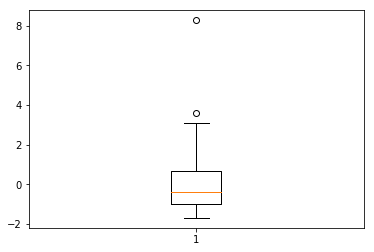

In [25]:
plt.boxplot(pca_df1.PC2)
q1 = pca_df1.PC2.quantile(0.05)
q3 = pca_df1.PC2.quantile(0.95)
iqr = q3-q1
outlier2 = pca_df1[(pca_df1.PC2>=q1) & (pca_df1.PC2<=q3)]

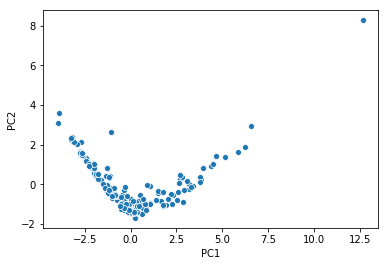

In [26]:
# Visualising the PCs

sns.scatterplot(x='PC1',y='PC2',data=pca_df1)

In [27]:
# Hopkins Statistic

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan


def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1*n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    
    rand_X = sample(range(0, n, 1), m)
    
    ujd = []
    wjd = []
    for j in range(0,m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1,-1),2,return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1,-1),2, return_distance=True)
        wjd.append(w_dist[0][1])
    
    H = sum(ujd)/(sum(ujd)+sum(wjd))
    if isnan(H):
        print(ujd,wjd)
        H = 0
    return H

In [28]:
# Checking the hopkins statistic to verify if it makes sense to do clustering
hopkins(pca_df1)

0.9737457023173737

In [29]:
# Since the value is >0.5 the given dataset has a good tendency to form clusters

In [30]:
newdf = pca_df1

### K-means Clustering

In [31]:
# Silhouette score
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k).fit(newdf)
    sse_.append([k, silhouette_score(newdf, kmeans.labels_)])

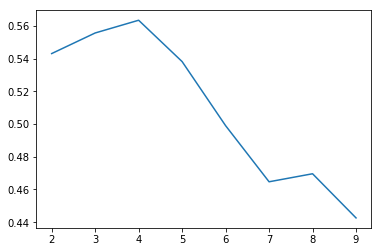

In [32]:
plt.plot(pd.DataFrame(sse_)[0],pd.DataFrame(sse_)[1]);

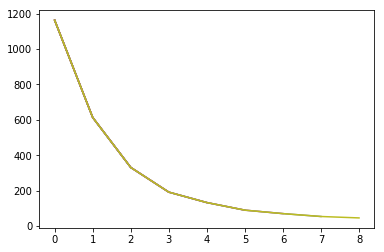

In [33]:
# Elbow curve
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(newdf)
    ssd.append(model_clus.inertia_)

    plt.plot(ssd)

In [34]:
model_clus2 = KMeans(n_clusters=4, max_iter=50, random_state=50)
model_clus2.fit(newdf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [35]:
newdf1 = pca_df1
newdf1.index = pd.RangeIndex(len(newdf1.index))
newdf_km = pd.concat([newdf1, pd.Series(model_clus2.labels_)],axis=1)
newdf_km.columns = ['PC1','PC2','KMeans']
newdf_km

,PC1,PC2,KMeans
0,-2.637813,1.485365,1
1,-0.022821,-1.429712,2
2,-0.456235,-0.707360,2
3,-2.722764,2.152293,1
4,0.649117,-1.017742,2
5,0.039416,-0.730262,2
6,-0.332875,-1.277745,2
7,3.180043,-0.242945,0
8,3.815220,0.270503,0
9,-0.466682,-0.512071,2


In [36]:
newdf_km['KMeans'].value_counts()

2    88
1    48
0    30
3     1
Name: KMeans, dtype: int64

In [37]:
# Merging the KMeans cluster ID with the original data
df_km = pd.merge(df,newdf_km, left_index=True,right_index=True)
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,KMeans
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.637813,1.485365,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.022821,-1.429712,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.456235,-0.707360,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.722764,2.152293,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649117,-1.017742,2


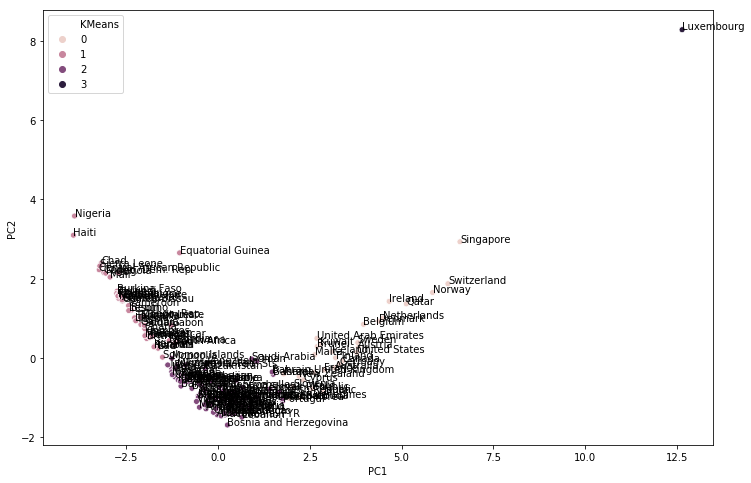

In [38]:
# Plotting PC1 and PC2 on a scatter plot while differentiating the clusters
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x='PC1', y='PC2',hue='KMeans',legend='full',data=df_km)
for i, y in enumerate (df_km.country):
    plt.annotate(y,(df_km.PC1[i],df_km.PC2[i]))
plt.show()

### Hierarchial Clustering

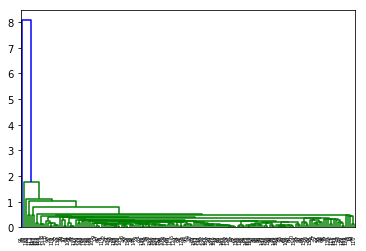

In [39]:
# Single Linkage

mergings = linkage(newdf, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

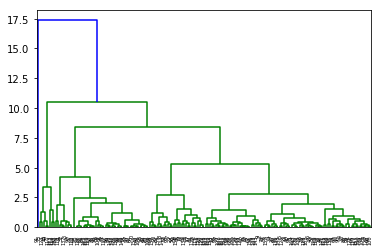

In [40]:
# Complete Linkage

c_merge = linkage(newdf, method='complete', metric='euclidean')
dendrogram(c_merge)
plt.show()

In [41]:
# 3-clusters
cluster_labels = cut_tree(c_merge, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 3, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [42]:
df_km['Hierarchial'] = cluster_labels
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,KMeans,Hierarchial
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.637813,1.485365,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.022821,-1.429712,2,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.456235,-0.707360,2,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.722764,2.152293,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649117,-1.017742,2,1


In [43]:
# Total counts of countries in each clusters
df_km['Hierarchial'].value_counts()

1    111
0     47
2      8
3      1
Name: Hierarchial, dtype: int64

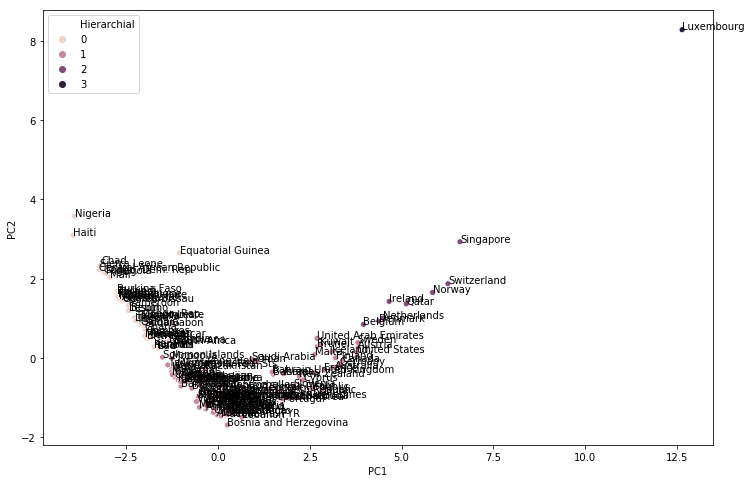

In [44]:
# Plotting PC1 and PC2 on a scatter plot while differentiating the clusters
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x='PC1', y='PC2',hue='Hierarchial',legend='full',data=df_km)
for i, y in enumerate (df_km.country):
    plt.annotate(y,(df_km.PC1[i],df_km.PC2[i]))
plt.show()

### Analysis of Hierarchial Clustering

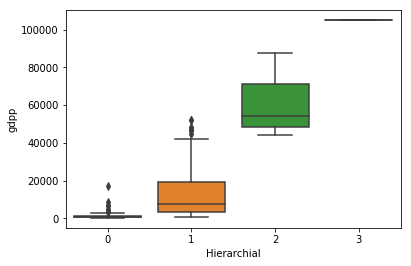

In [45]:
# Plotting gdpp against the hierarchial clusters
sns.boxplot(x='Hierarchial',y='gdpp', data=df_km)

GDPP is lowest for 0th cluster in Hierarchial clustering

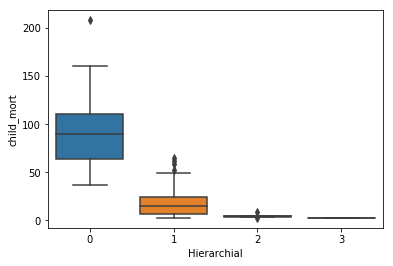

In [46]:
# Plotting child_mort against the Hierarchial clusters
sns.boxplot(x='Hierarchial',y='child_mort', data=df_km)

Child mortality rate is high for 0th cluster in Hierarchial clustering

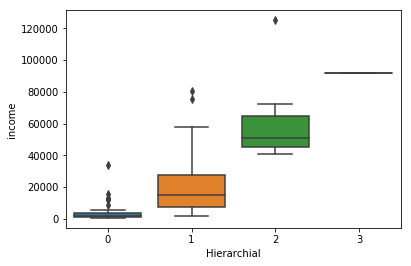

In [47]:
# Plotting income against the Hierarchial clusters
sns.boxplot(x='Hierarchial',y='income', data=df_km)

Income is lowest in 0th cluster of Hierarchial cluster

#### Hence we can say that countries in the 0th cluster should recieve the aid first as per Hierarchial clustering

### Analysis of K-Means Clustering

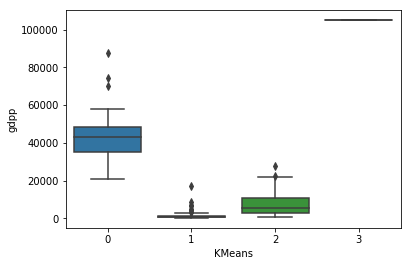

In [48]:
# Plotting gdpp against the KMeans clusters
sns.boxplot(x='KMeans',y='gdpp', data=df_km)

GDPP is observed to be the lowest in cluster-1 in K-Means

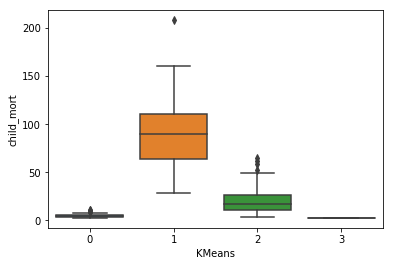

In [49]:
# Plotting child_mort against the KMeans clusters
sns.boxplot(x='KMeans',y='child_mort', data=df_km)

Child mortality is high in cluster-1 of K-Means

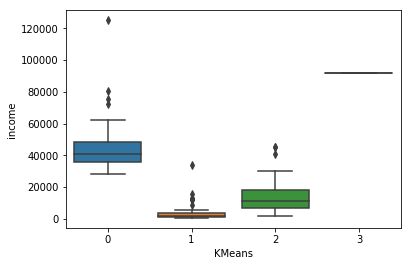

In [50]:
# Plotting income against the KMeans clusters
sns.boxplot(x='KMeans',y='income', data=df_km)

Income is low in cluster-1 in K-Means

#### Hence we can say that countries in cluster 1 of K-Means clustering should receive the aid first.

### Plotting scatter plot  - child_mort, gdpp & income

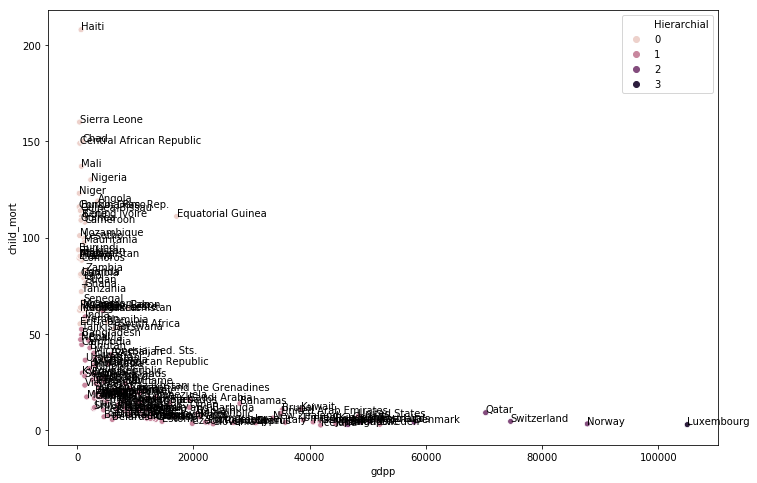

In [51]:
# Plotting gdpp and child_mort using Hierarchial clusters
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x='gdpp', y='child_mort',hue='Hierarchial',legend='full',data=df_km)
for i, y in enumerate (df_km.country):
    plt.annotate(y,(df_km.gdpp[i],df_km.child_mort[i]))
plt.show()

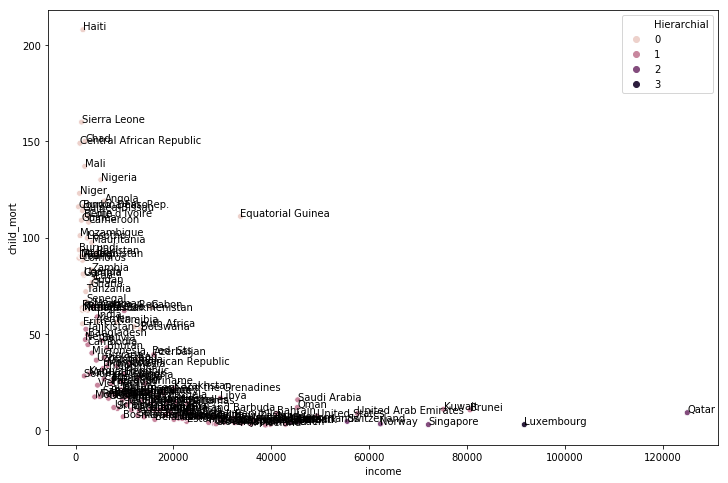

In [52]:
# Plotting income and child_mort using Hierarchial clusters
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x='income', y='child_mort',hue='Hierarchial',legend='full',data=df_km)
for i, y in enumerate (df_km.country):
    plt.annotate(y,(df_km.income[i],df_km.child_mort[i]))
plt.show()

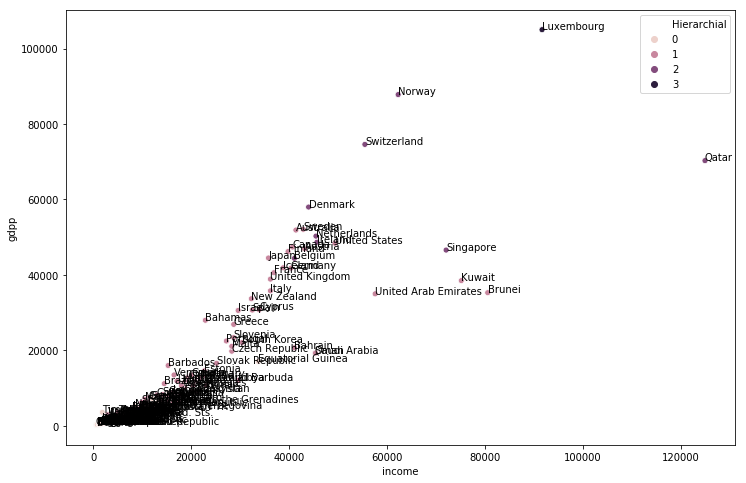

In [53]:
# Plotting income and gdpp using Hierarchial clusters
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x='income', y='gdpp',hue='Hierarchial',legend='full',data=df_km)
for i, y in enumerate (df_km.country):
    plt.annotate(y,(df_km.income[i],df_km.gdpp[i]))
plt.show()

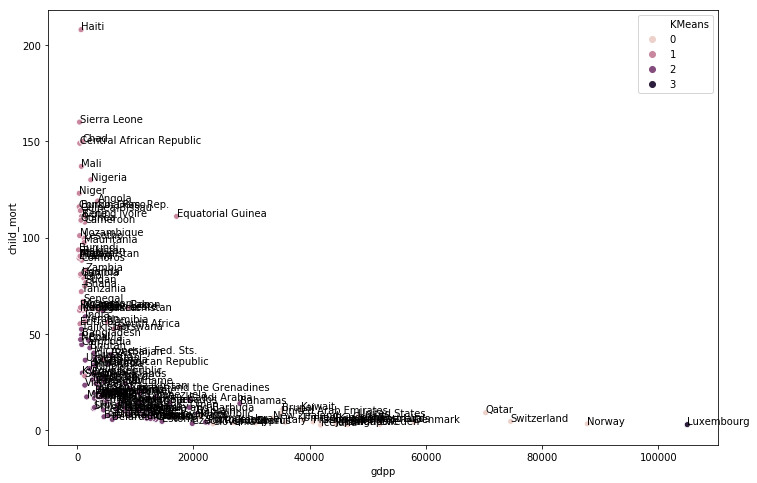

In [54]:
# Plotting gdpp and child_mort using KMeans clusters
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x='gdpp', y='child_mort',hue='KMeans',legend='full',data=df_km)
for i, y in enumerate (df_km.country):
    plt.annotate(y,(df_km.gdpp[i],df_km.child_mort[i]))
plt.show()

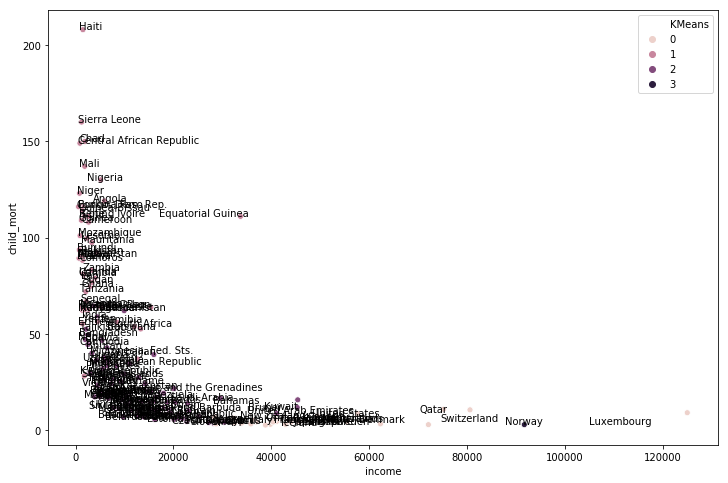

In [55]:
# Plotting income and child_mort using KMeans clusters
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x='income', y='child_mort',hue='KMeans',legend='full',data=df_km)
for i, y in enumerate (df_km.country):
    plt.annotate(y,(df_km.gdpp[i],df_km.child_mort[i]))
plt.show()

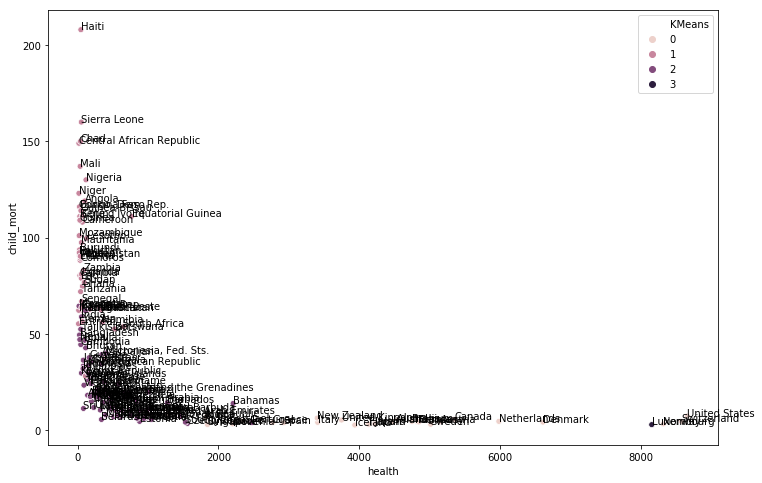

In [56]:
# Plotting health and child_mort using KMeans clusters
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x='health', y='child_mort',hue='KMeans',legend='full',data=df_km)
for i, y in enumerate (df_km.country):
    plt.annotate(y,(df_km.health[i],df_km.child_mort[i]))
plt.show()

In [57]:
# Finding the mean child_mort, gdpp and income as per the hierarchial clusters
hc_child_mort = pd.DataFrame(df_km.groupby(['Hierarchial']).child_mort.mean())
hc_gdpp = pd.DataFrame(df_km.groupby(['Hierarchial']).gdpp.mean())
hc_income = pd.DataFrame(df_km.groupby(['Hierarchial']).income.mean())

In [58]:
# Merging the results
analysis_df = pd.concat([pd.Series([0,1,2,3]),hc_child_mort,hc_gdpp,hc_income],axis=1)

In [59]:
# Naming the columns
analysis_df.columns = ['ClusterID','child_mort','gdpp','income']

In [60]:
# Checking the final result
analysis_df

,ClusterID,child_mort,gdpp,income
0,0,92.961702,1922.382979,3942.404255
1,1,17.858559,13414.072072,18873.603604
2,2,4.600000,60087.500000,61400.000000
3,3,2.800000,105000.000000,91700.000000


In [62]:
# Finding the mean child_mort, gdpp and income as per the KMeans clusters
km_child_mort = pd.DataFrame(df_km.groupby(['KMeans']).child_mort.mean())
km_gdpp = pd.DataFrame(df_km.groupby(['KMeans']).gdpp.mean())
km_income = pd.DataFrame(df_km.groupby(['KMeans']).income.mean())

In [63]:
# Merging the results
km_analysis_df = pd.concat([pd.Series([0,1,2,3]),km_child_mort,km_gdpp,km_income],axis=1)

In [64]:
# Naming the columns
km_analysis_df.columns = ['ClusterID','child_mort','gdpp','income']

# Checking the final result
km_analysis_df

,ClusterID,child_mort,gdpp,income
0,0,5.006667,44103.333333,46676.666667
1,1,91.610417,1909.208333,3897.354167
2,2,20.918182,7332.636364,13455.568182
3,3,2.800000,105000.000000,91700.000000


In [65]:
# Sorting the countries list as per Hierarchial Cluster-0.
fin = df_km[df_km['child_mort']<92.96]
final = fin[fin['gdpp']<1922.38]
final = final[final['income']<3942.40]

In [66]:
# The final list of countries that should recieve funds are mentioned below and are in 25 in count.
final

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,KMeans,Hierarchial
0,Afghanistan,90.2,55.30000,41.9174,248.297000,1610,9.44,56.2,5.82,553,-2.637813,1.485365,1,0
12,Bangladesh,49.4,121.28000,26.6816,165.244000,2440,7.14,70.4,2.33,758,-1.014703,-0.704205,2,1
27,Cambodia,44.4,425.22600,44.6448,467.670000,2520,3.12,66.1,2.88,786,-1.180456,-0.472186,2,1
36,Comoros,88.2,126.88500,34.6819,397.573000,1410,3.87,65.9,4.75,769,-1.950995,0.629914,1,0
50,Eritrea,55.2,23.08780,12.8212,112.306000,1420,11.60,61.7,4.61,482,-1.948382,0.494121,1,0
56,Gambia,80.3,133.75600,31.9778,239.974000,1660,4.30,65.5,5.71,562,-2.106257,0.846571,1,0
59,Ghana,74.7,386.45000,68.3820,601.290000,3060,16.60,62.2,4.27,1310,-2.001576,0.740818,1,0
80,Kenya,62.2,200.16900,45.9325,324.912000,2480,2.09,62.8,4.37,967,-1.738892,0.309227,1,0
81,Kiribati,62.7,198.17000,168.3700,1190.510000,1730,1.52,60.7,3.84,1490,-1.669269,0.266837,1,0
83,Kyrgyz Republic,29.6,454.08000,54.3840,718.960000,2790,10.00,68.5,3.10,880,-1.090583,-0.548494,2,1
